# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [2]:
df <- read_csv("wine.csv")
glimpse(df)
summary(df[, sapply(df, is.numeric)])

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [3]:
df_scale <- df %>%
  mutate(
    across(.cols = -class, .fns = ~ as.numeric(scale(.))
    )
  )
df_scale

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


b) Based on the summary statistics, I noticed that some variables have much larger ranges than others (e.g., magnesium compared to alcohol). We don't know if the raw scales for these variables are inherently meaningful, and thus standarding the mean and variance is necessary. We center because we want to rotate around the data's centroid during PCA. We scale to ensure that variables with larger ranges aren't dominating the PCs and the PCA results are revealing meaningful variance.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.139554110,-0.483986584,-0.2073937774,-0.05202454,0.26128775,0.16536102,0.08109663,0.41085968,-0.48056233,0.26657031,-0.22307817,-0.265240813,0.02620159,-0.082231639
Malicacid,0.231278771,-0.224052306,0.0888801156,0.50792619,0.09224016,0.58008658,-0.38986636,0.07811783,0.03061612,-0.32214644,0.07118746,0.120491970,-0.04853550,0.025647729
Ash,-0.000758731,-0.315929724,0.6261495205,-0.23483910,0.12056093,0.12592437,0.16145692,-0.17151142,0.28629906,-0.08144576,-0.49601658,-0.047383556,0.17320790,-0.014819695
Alcalinity_of_ash,0.230293094,0.011263089,0.6120248225,0.06750549,-0.05695664,-0.09534441,0.27494282,0.42011625,-0.15910053,0.11386621,0.47628860,-0.058460009,-0.15775842,0.099229101
Magnesium,-0.131041028,-0.300236426,0.1308963493,-0.25528136,-0.75961835,0.10479264,-0.32783323,-0.15219546,-0.26275246,0.10095846,0.07123668,0.061706989,-0.05861093,-0.013969977
Total_phenols,-0.372792367,-0.066404359,0.1463803150,0.19504272,0.14215523,-0.12544691,0.03482640,-0.38223991,-0.35387300,-0.32340394,0.29983404,-0.302432020,0.41707864,0.169545891
Flavanoids,-0.403237284,0.002017377,0.1508538950,0.14885364,0.10784345,-0.04674972,0.06557152,-0.18072307,-0.07250367,-0.15083796,-0.02996008,-0.046369111,-0.71106740,-0.452804254
Nonflavanoid_phenols,0.278847444,-0.027604752,0.1701277248,-0.27078415,0.47058669,-0.25340042,-0.60671679,-0.23206171,-0.17571862,0.23033372,0.12026342,0.042506815,-0.08908413,-0.058790535
Proanthocyanins,-0.291925075,-0.040561908,0.1497147503,0.43527140,-0.12361143,-0.49254225,-0.40687583,0.35471193,0.24105395,0.12403042,-0.23448023,-0.094480759,0.11423370,0.039562012
Color_intensity,0.089426322,-0.529856997,-0.1372817801,0.06919472,0.05497895,-0.42598886,0.19989161,-0.03762399,-0.06894372,-0.24930845,0.02389587,0.601198625,-0.08479641,0.160155281


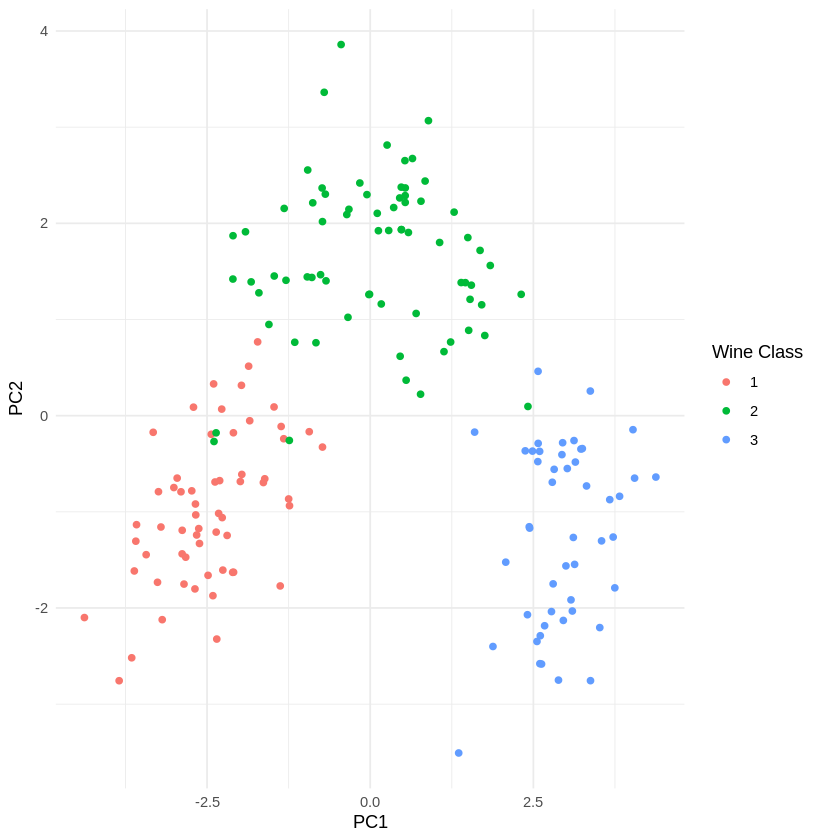

In [4]:
# a)
r <- prcomp(df_scale);
# b)
summary(r)
# d)
r$rotation
# e)
df_pc <- as.data.frame(r$x) |>
  mutate(class = df_scale$class)
ggplot(df_pc, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point() +
  labs(color = "Wine Class") +
  theme_minimal()

b) The first PC explains about 38.2% of the variance, and the second PC explains about 18.4% of the variance. We use the summary() function to see this information.


c) We are doing PCA first because we want to reduce the dimensions and do some preprocessing before analyzing the data. We usually do this before t-SNE because t-SNE is more computationally intensive.


f) Based on the plotting of the first two PCs, we see three clusters matching well with the wine class. This means that the first two principle components (based on chemical characteristics of the wine) are adequate in effectively distinguishing the three wine classes.


g) A case where PCA fails is when there are two circular clusters apart from one another. In this case, the only variation would be the radius and rotation won't really do anything, which is why PCA would not work.


h) A vector space is always linear, but a manifold is only locally linear. Manifolds may not satisfy all the vector axioms that vector spaces always upholds. When we assume our data lies on a manifold structure, t-SNE can be used as a nonlinear dimension reduction technique that keeps the local neighborhoods.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


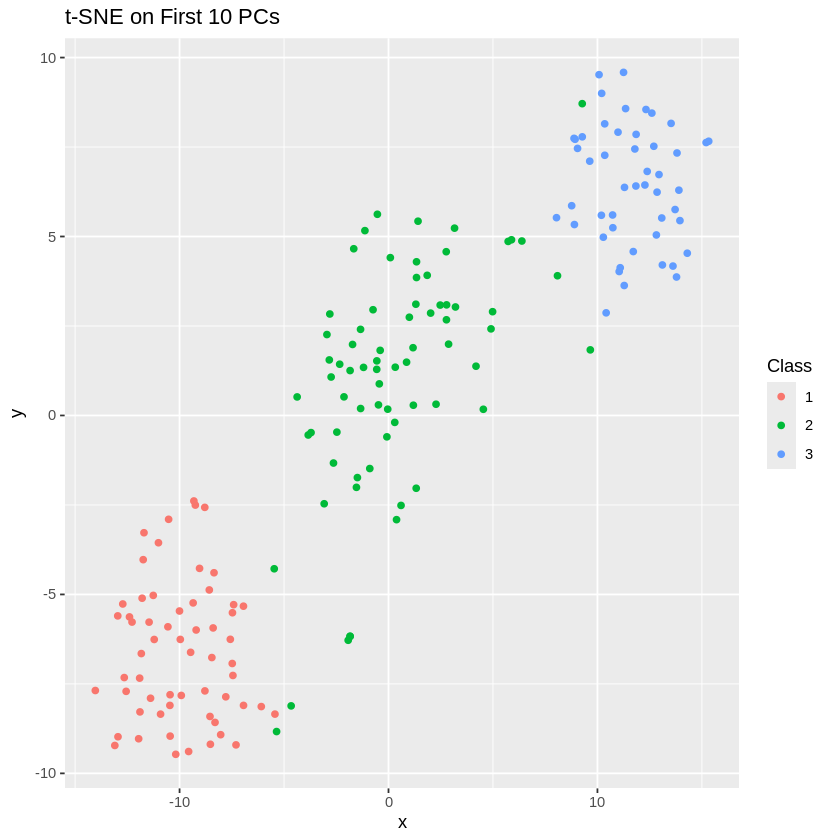

In [5]:
library(dplyr)
library(Rtsne)
library(ggplot2)

# a)
set.seed(123)
pc_subset <- r$x[, 1:10] %>%
  as.data.frame() %>%
  mutate(class = df_scale$class)
tsne_output <- Rtsne(select(pc_subset, -class),
                     dims = 2,
                     perplexity = 30,
                     verbose = FALSE,
                     check_duplicates = TRUE)

# b)
tsne_tibble <- as_tibble(tsne_output$Y) %>%
  setNames(c("x", "y")) %>%
  mutate(class = pc_subset$class)

ggplot(tsne_tibble, aes(x = x, y = y, color = factor(class))) +
  geom_point() +
  labs(title = "t-SNE on First 10 PCs",
       color = "Class")


c) t-SNE is a great tool for visualization rather than preprocessing; We didn't stop at PCA and want to proceed with t-SNE because t-SNE has the ability to keep nonlinear structures and reveal clusters even more clearly.

d) This workflow works particularly well for other high-dimensional data, such as imaging and genomics data.